In [3]:
import tensorflow as tf
import sklearn as sk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
#import kerastuner

In [4]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

# Extraction des images


In [2]:
# download data from Stanfords Dogs Dataset
data_dir = tf.keras.utils.get_file(
    fname='images.tar',
    origin='http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar',
    cache_subdir='datasets',
    extract=False,
    cache_dir='./')

793579520/793579520 [==============================] - 487s 1us/step


In [7]:
basedir = os.path.abspath('./datasets')
for name_dir in os.listdir(basedir):
    if not os.path.isdir(os.path.join(basedir, name_dir)):  # Not a directory
        continue
    if 'n02' in name_dir:  # Invalid format
        new_name = name_dir.split(sep='-', maxsplit=1)[1]
        os.rename(
            os.path.join(basedir, name_dir),
            os.path.join(basedir, new_name))

# Visualisation des images


In [11]:
import os

dir_path = './datasets'
print(os.listdir(dir_path))

['images.tar']


In [12]:
import tarfile

tar_file_path = './datasets/images.tar'
with tarfile.open(tar_file_path, 'r') as tar:
    tar.extractall('./datasets')

In [15]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory='./datasets/Images',
    labels='inferred',
    seed=18)

Found 20580 files belonging to 120 classes.


In [16]:
num_classes = len(dataset.class_names)
print(f'Il y a {num_classes} classes de race de chien dans notre dataset')

Il y a 120 classes de race de chien dans notre dataset


In [17]:
list_classes = []
list_size = []

basedir = os.path.abspath('./datasets/Images')
for name_class in os.listdir(basedir):
    class_path = os.path.join(basedir, name_class)
    list_classes.append(name_class)
    list_size.append(len(os.listdir(class_path)))

df = pd.DataFrame({'classes':list_classes, 'size':list_size})

In [20]:
df.head()

,classes,size
0,n02085620-Chihuahua,152
1,n02085782-Japanese_spaniel,185
2,n02085936-Maltese_dog,252
3,n02086079-Pekinese,149
4,n02086240-Shih-Tzu,214


<AxesSubplot:xlabel='size', ylabel='classes'>

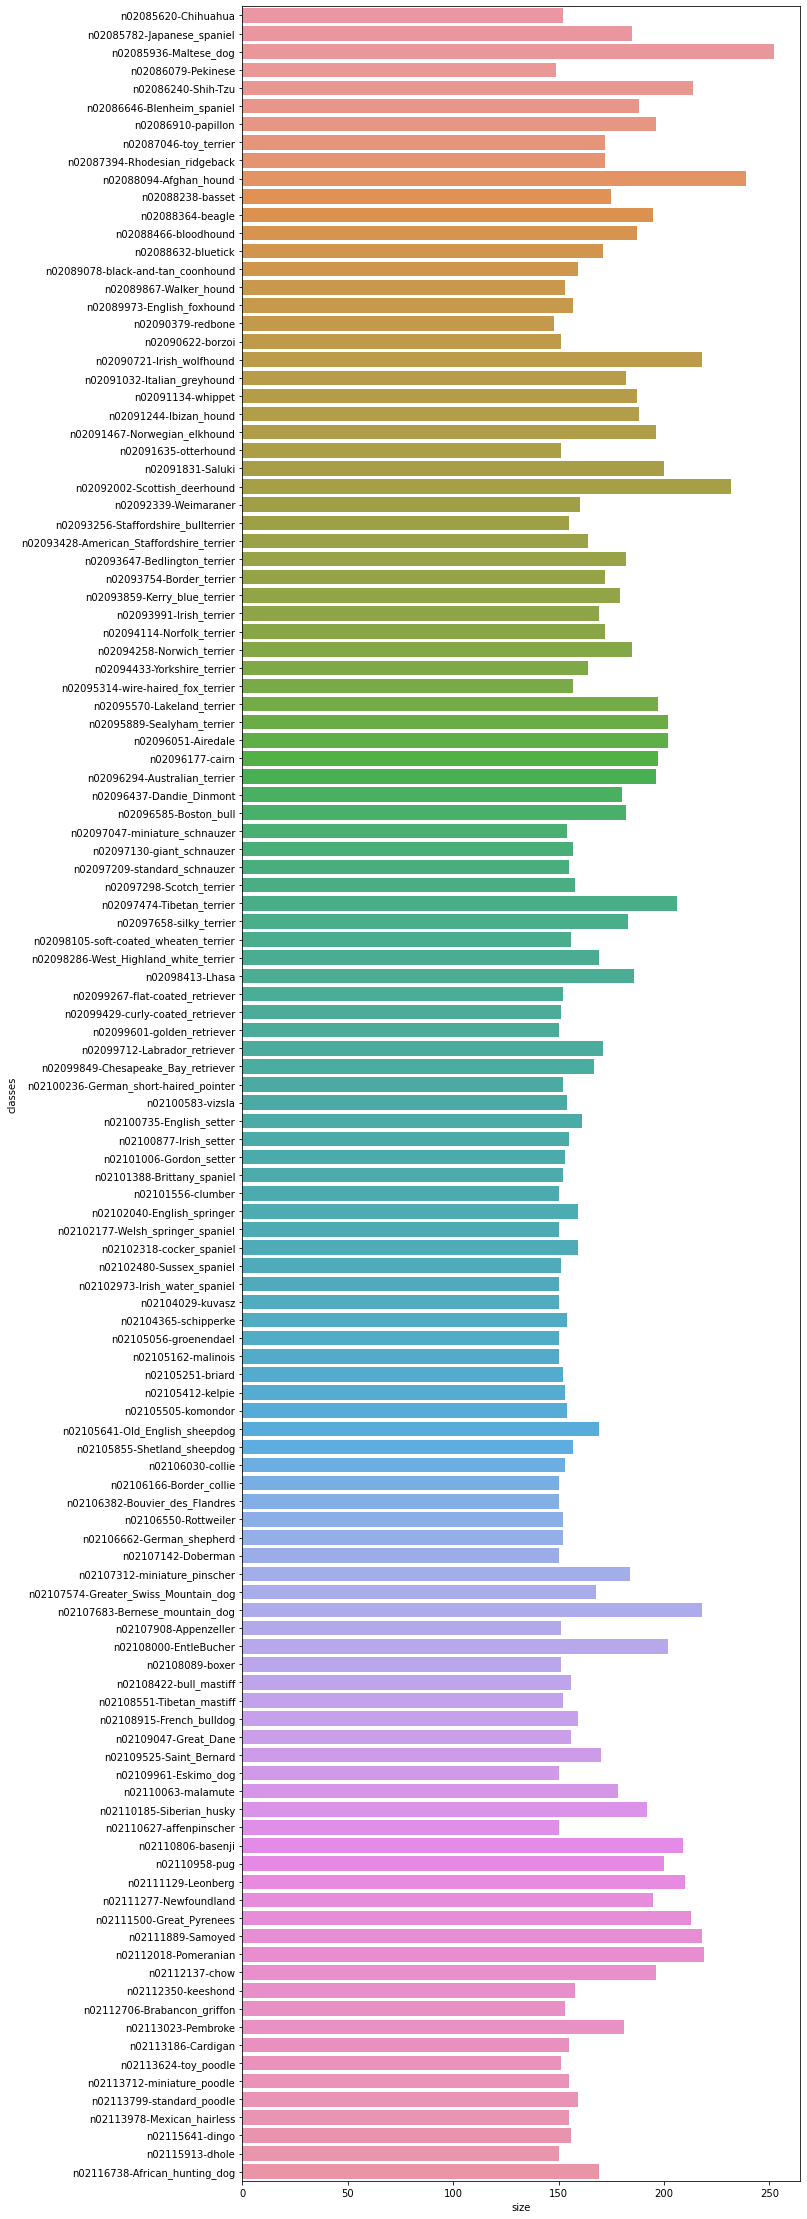

In [18]:
plt.figure(figsize=(10,40))
sns.barplot(x='size', y='classes', data=df)

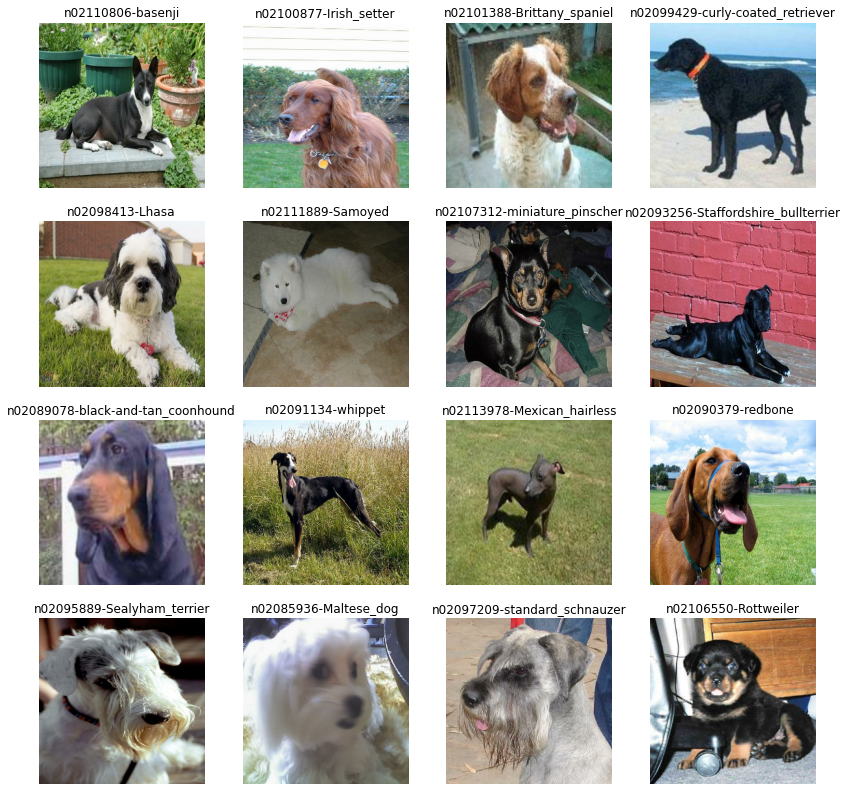

In [19]:
class_names = dataset.class_names

plt.figure(figsize=(14, 14))
for image_list, label_list in dataset.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(image_list[i].numpy().astype("uint8"))
        plt.title(class_names[label_list[i]])
        plt.axis("off")

# Model CNN simple


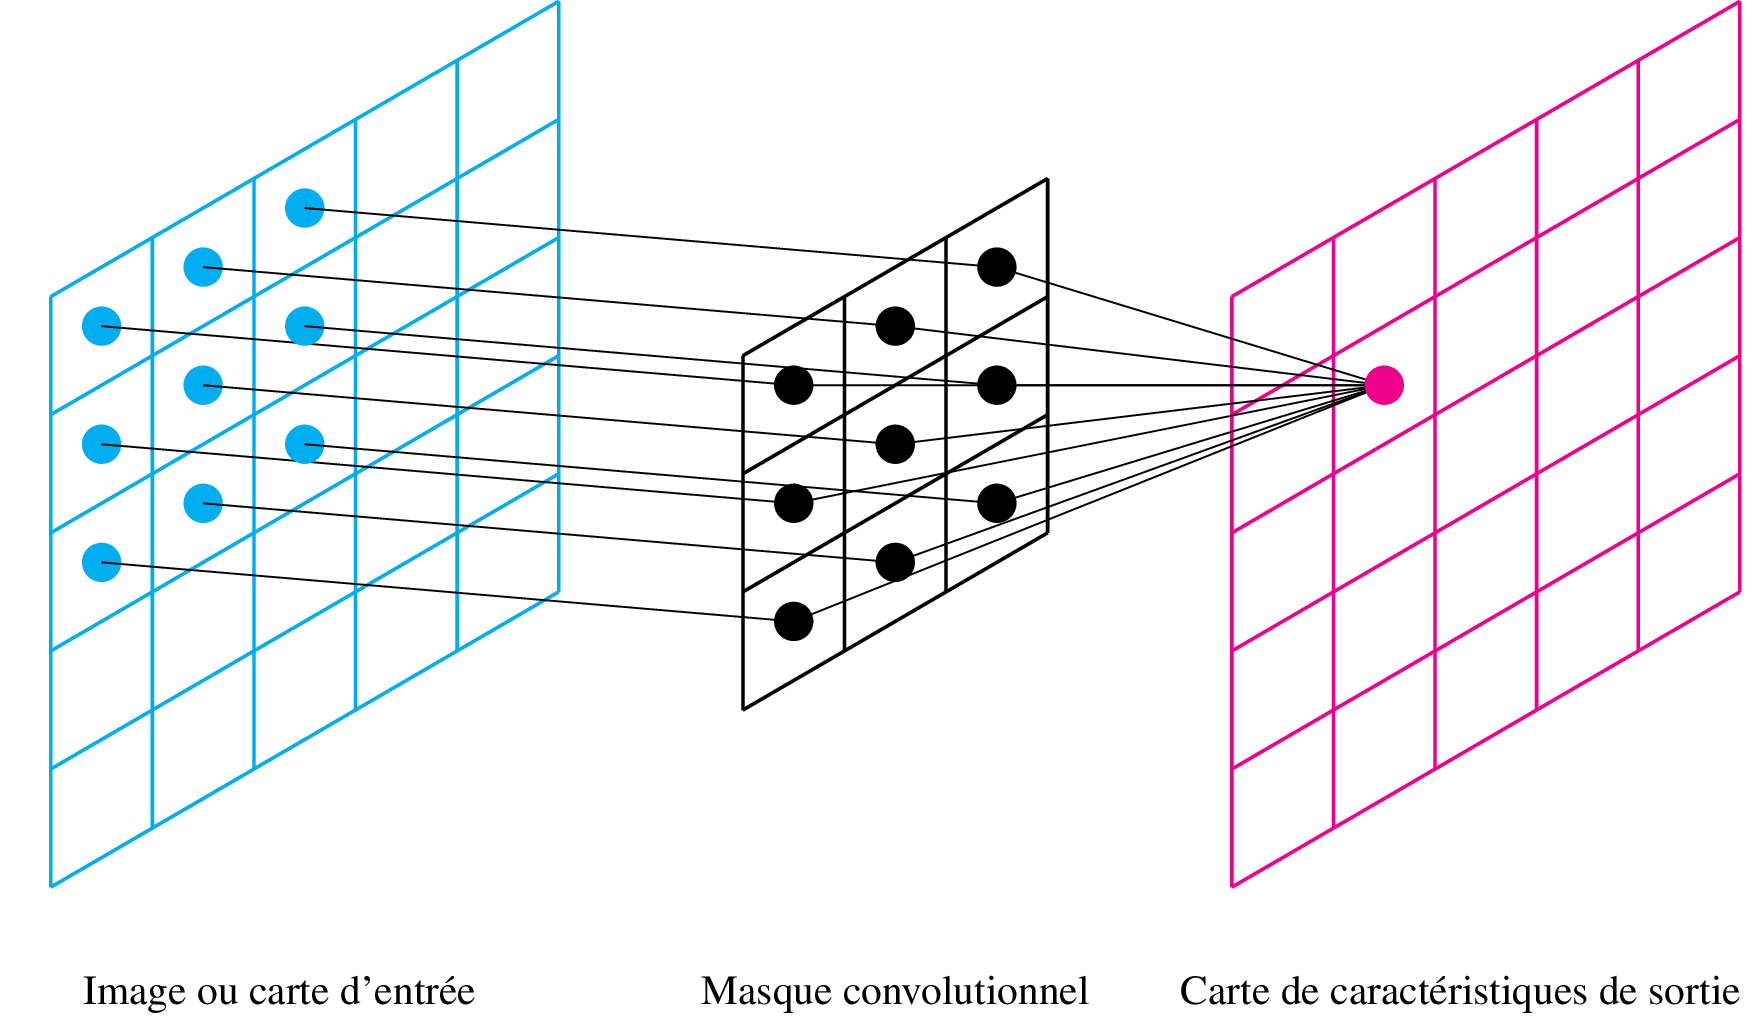